In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
zoo = pd.read_csv("zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


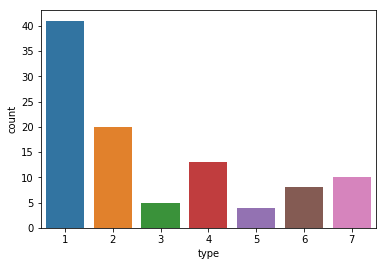

In [5]:
sns.countplot(zoo['type'],label="Count")


In [6]:
x_data = zoo.iloc[:,:-1]
x_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [7]:
y_data = zoo.iloc[:,-1:]
y_data.head()

,type
0,1
1,1
2,4
3,1
4,1


In [8]:
print("Feature Data :", x_data.shape)
print("Label Data :", y_data.shape)

Feature Data : (101, 17)
Label Data : (101, 1)


In [9]:
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (70, 17)
Testing Data has (31, 17)


In [11]:
train_name = train_x['animal name']
test_name = test_x['animal name']

train_x = train_x.iloc[:,1:]
test_x = test_x.iloc[:,1:]

print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (70, 16)
Testing Data has (31, 16)


In [12]:
X = tf.placeholder(tf.float32, [None,16]) 
Y = tf.placeholder(tf.int32, [None, 1])

In [13]:
Y_one_hot = tf.one_hot(Y, 7)  # one hot encoding
Y_one_hot = tf.reshape(Y_one_hot, [-1, 7])

In [14]:
W = tf.Variable(tf.random_normal([16, 7],seed=0), name='weight')
b = tf.Variable(tf.random_normal([7],seed=0), name='bias')

In [15]:
logits = tf.matmul(X, W) + b

In [16]:
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
# cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis)))

In [17]:
train  = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

In [18]:
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:     0	Loss: 3.402	Acc: 30.00%
Step:  1000	Loss: 0.135	Acc: 87.14%
Step:  2000	Loss: 0.076	Acc: 90.00%
Step:  3000	Loss: 0.054	Acc: 90.00%
Step:  4000	Loss: 0.043	Acc: 90.00%
Step:  5000	Loss: 0.037	Acc: 90.00%
Model Prediction = 0.9
Test Prediction = 0.9354839


In [20]:
sub = pd.DataFrame()
sub['Name'] = test_name
sub['Predict_Type'] = test_predict
sub['Origin_Type'] = test_y
sub['Correct'] = test_correct

In [21]:
from sklearn.metrics import confusion_matrix

In [23]:
cm = confusion_matrix(sub['Origin_Type'], sub['Predict_Type'])

In [24]:
cm

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0],
       [ 1,  0,  0,  0,  1,  1,  0,  0]], dtype=int64)